# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk - Programmeringsøving 2

$\textbf{Forkunnskaper:}$ Introduksjon til SciPy-notebooken og Euler-metoden. 

$\textbf{Læringsmål:}$ Løse andreordens ODE ved Euler-Cromer metoden. Bli kjent med SciPy biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

----------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

### Oppgave 1 - Løsning av bevegelsesligningen ved Euler-Cromer metoden 
---------

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

$\textbf{a)}$ Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [1]:
# Husk å definere nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt


# Definer konstanter og initialbetingelser
l = 1
m = 5
g = 9.81
theta_0 = 0.2
omega_0 = 0.0

# Tidskonstanter
T_i = 0
T_f = 10
T = T_f - T_i
samples = 10000
dt = T/samples

def euler_cromer_approx(theta_0, omega_0, dt, T_i):
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    theta_0: initial angular displacement 
    omega_0: initial angular velocity
    dt: timestep
    """
    theta=np.zeros(samples)
    omega=np.zeros(samples)
    t=np.zeros(samples)
    theta[0]=theta_0
    omega[0]=omega_0
    t[0]=T_i

    for n in range(1,samples):
        """
        Beregner ny verdi av omega ved hjelp av gammel theta og omega
        """
        omega[n]=omega[n-1]-g/l*theta[n-1]*dt
        
        """
        Beregner ny verdi av omega ved hjelp av nye omega og gammel theta
        """
        theta[n]=theta[n-1]+omega[n]*dt
        
        """
        Får et tid-array med samme dimensjon som tidligere arrays for plotting
        """
        t[n]=t[n-1]+dt
        
    
    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta,omega,t

# Tilordner arrays til output-ene fra approksimeringsfunksjonen
thetaArr,omegaArr,timeArr = euler_cromer_approx(theta_0,omega_0,dt,T_i)

plt.figure("test")
plt.plot(timeArr,thetaArr,label="Theta")
plt.plot(timeArr,omegaArr,label="Omega")
plt.legend()
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

$\textbf{b)}$ Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.001$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid. Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (Oppgave 2 b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$$T = 2 \pi \sqrt{\frac{l}{g}}.$$
Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. **Hint:** Plot for tid opp til $t = 2 \pi \sqrt{\frac{l}{g}}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

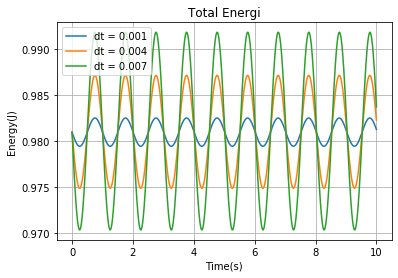

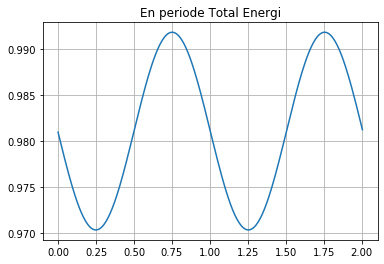

Delta E etter en periode: 0.00027127675588323186


In [2]:
# Oppgave 2
def energy_calculation(theta_0, omega_0, dt):
    """
    Regner ut total energi for systemet numerisk ved euler-cromer methoden.
    Inputs:
    theta_0: startverdi av theta (vinkelutslag)
    omega_0: startverdi av omega (vinkelhastighet)
    
    """
    samples = int(T/dt) # Finner sample-rate for valgt dt
    
    # Lager arrays med verdier vha Euler-cromer approksimasjon
    thetaArr, omegaArr, timeArr = euler_cromer_approx(theta_0,omega_0,dt,T_i)
    
    # Funksjonsuttrykk for total-energi
    energy_func = lambda m,l,omega,theta: (1/2)*m*(l**2)*(omega**2) + (1/2)*m*g*l*(theta**2)
    
    # Får å få et samme-dimensjonert tid-array
    t = np.linspace(T_i,T,samples)
    energy = np.zeros(samples)
    
    for i in range(len(t)):
        """
        Beregning av total-energi for hvert t-element i t-array
        """
        energy[i] = energy_func(m,l,omegaArr[i],thetaArr[i])
    
    
    E_total = energy

    return t, E_total

# Verdier av dt vi ønsker å plotte for
dt1 = 0.001
dt2 = 0.004
dt3 = 0.007

plt.figure(2)
plt.title("Total Energi")
plt.plot(energy_calculation(theta_0,omega_0,dt1)[0],energy_calculation(theta_0,omega_0,dt1)[1], label="dt = 0.001")
plt.plot(energy_calculation(theta_0,omega_0,dt2)[0],energy_calculation(theta_0,omega_0,dt2)[1], label="dt = 0.004")
plt.plot(energy_calculation(theta_0,omega_0,dt3)[0],energy_calculation(theta_0,omega_0,dt3)[1], label="dt = 0.007")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.legend()
plt.grid()
plt.show()

# Oppgave 3
def energy_diff(time,E_tot):
    """
    Plotter en periode av Total Energi graf og finner differanse i Total Energi i start og slutt av periode.
    Inputs:
    
    time: Tid-array av samme dimensjon som E_tot
    E_tot: Array med total energi.
    """
    E_tot_0 = E_tot[0]
    
    # Uttryk for tid ved slutten av periode
    T_p = 2*np.pi*np.sqrt(l/g)
    
    i = 0
    while time[i] < T_p:
        i += 1
    
    time_p = np.zeros(i)
    E_tot_p = np.zeros(i)
    for j in range(i):
        time_p[j] = time[j]
        E_tot_p[j] = E_tot[j]
    
    plt.figure("En periode Total Energi")
    plt.title("En periode Total Energi")
    plt.plot(time_p,E_tot_p,label="dt = 0.001")
    plt.grid()
    plt.show()
    
    print("Delta E etter en periode: " + str(abs(E_tot_p[0]-E_tot_p[-1])))
        
energy_diff(energy_calculation(theta_0,omega_0,dt3)[0],energy_calculation(theta_0,omega_0,dt3)[1])
    

$\textbf{c)}$ Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
	\label{bevegelse}
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. **Hint:** Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. **Tips:** Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 

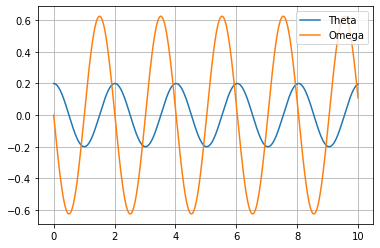

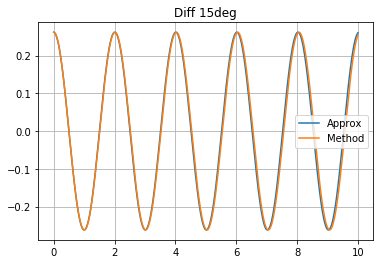

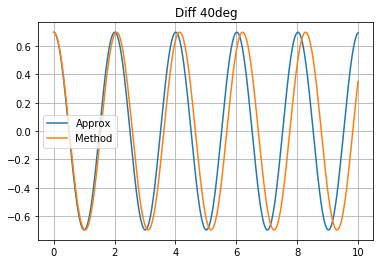

In [3]:
# Oppgave 1
def euler_cromer_method(theta_0, omega_0, dt, T_i):
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    theta_0: initial angular displacement 
    omega_0: initial angular velocity
    dt: timestep
    """
    theta=np.zeros(samples)
    omega=np.zeros(samples)
    t=np.zeros(samples)
    theta[0]=theta_0
    omega[0]=omega_0
    t[0]=T_i

    for n in range(1,samples):
        """
        Beregner ny verdi av omega ved hjelp av gammel theta og omega
        """
        omega[n]=omega[n-1]-g/l*np.sin(theta[n-1])*dt
        
        """
        Beregner ny verdi av omega ved hjelp av nye omega og gammel theta
        """
        theta[n]=theta[n-1]+omega[n]*dt
        
        """
        Får et tid-array med samme dimensjon som tidligere arrays for plotting
        """
        t[n]=t[n-1]+dt
        
    
    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta,omega,t

# Tilordner arrays til output-ene fra approksimeringsfunksjonen
thetaArr,omegaArr,timeArr = euler_cromer_method(theta_0,omega_0,dt,T_i)

plt.figure("test")
plt.plot(timeArr,thetaArr,label="Theta")
plt.plot(timeArr,omegaArr,label="Omega")
plt.legend()
plt.grid()
plt.show()

# Oppgave 2

# Nye startverdier

theta_0 = np.radians(15)
omega_0 = 0
dt = 0.001

thetaArr_a,omegaArr_a,timeArr_a = euler_cromer_approx(theta_0,omega_0,dt,T_i)
thetaArr_m,omegaArr_m,timeArr_m = euler_cromer_method(theta_0,omega_0,dt,T_i)

plt.figure("Diff 15deg")
plt.title("Diff 15deg")
plt.plot(timeArr_a,thetaArr_a,label="Approx")
plt.plot(timeArr_m,thetaArr_m,label="Method")
plt.legend()
plt.grid()
plt.show()

theta_0 = np.radians(40)
omega_0 = 0
dt = 0.001

thetaArr_a,omegaArr_a,timeArr_a = euler_cromer_approx(theta_0,omega_0,dt,T_i)
thetaArr_m,omegaArr_m,timeArr_m = euler_cromer_method(theta_0,omega_0,dt,T_i)

plt.figure("Diff 40deg")
plt.title("Diff 40deg")
plt.plot(timeArr_a,thetaArr_a,label="Approx")
plt.plot(timeArr_m,thetaArr_m,label="Method")
plt.legend()
plt.grid()
plt.show()

###  Oppgave 2 - Bruk av SciPy biblioteket
---------------

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard (Undervisningsmateriell>Diverse>Introduksjon til SciPy). **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. ordens Runge-Kutta og 5. ordens Runge-Kutta) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE'er. 

$\textbf{a)}$ Lag en funksjon som tar inn en float, `t`, og et array, `vals`, og returnerer en arAray av de to verdiene til høyresiden av de to ODE'ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. **Hint:** Skriv først bevegelsesligningen for pendelen som to førsteordens ODE'er (slik som ble gjort i programmeringsøving 1). 


In [4]:
def equation(t, vals):
    """
    Funksjonen tar inn t, som er en float, og vals som er en array med to elementer
    i dette tilfellet, [val1, val2], og returnerer verdien av høyre side
    av ligningene.
    
    t: float, tid
    vals: array med verdi for theta og omega
    
    Return: array med høyre-side av ligningene, som [ligning1, ligning2]
    """
    theta,omega = vals[0],vals[1]
    
    # Uttrykk for dw
    dw = -g/l*np.sin(theta)
    
    # Uttryk for dtheta
    dtheta = omega
    
    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (aswell as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (aswell as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

$\textbf{b)}$ Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$ s.

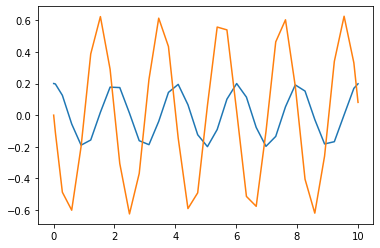

In [5]:
from scipy.integrate import solve_ivp as DestoryerOfOrdinaryDifferentialEquations

def RK45_method(RHS, theta_0, omega_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    return:
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    initialValues = [theta_0,omega_0]

    timeSpan = [0,t_1+dt]
    
    solution = DestoryerOfOrdinaryDifferentialEquations(RHS,timeSpan,initialValues)
    
    theta = solution.y[0, : ]
    omega = solution.y[1, : ]
    times = solution.t
    
    
    return theta, omega, times


theta,omega,times = RK45_method(equation, 0.2, 0, 10, 0.01)
# PLOT VINKELUTSLAGET


plt.figure("Scipy")
plt.plot(times,theta,label="Theta")
plt.plot(times,omega,label="omega")
plt.show()
    